In [1]:
import numpy as np
from simplex_method import SimplexMethod
import matplotlib.pyplot as plt

c = np.array([-40,-30])
A = np.array([[1,1],[2,1]])
b = np.array([12,16])

#full solve
s = SimplexMethod(c,A,b,verbose=True)
print(s.solve())

Initial Tableau:
[[  1.   1.   1.   0.   0.  12.]
 [  2.   1.   0.   1.   0.  16.]
 [-40. -30.   0.   0.   1.   0.]]
Pivot Column based on value:
0 -40.0
Pivoted Tableau:
[[  0.    0.5   1.   -0.5   0.    4. ]
 [  1.    0.5   0.    0.5   0.    8. ]
 [  0.  -10.    0.   20.    1.  320. ]]
Updated Tableau:
[[  0.    0.5   1.   -0.5   0.    4. ]
 [  1.    0.5   0.    0.5   0.    8. ]
 [  0.  -10.    0.   20.    1.  320. ]]
Pivot Column based on value:
1 -10.0
Pivoted Tableau:
[[  0.   1.   2.  -1.   0.   8.]
 [  1.   0.  -1.   1.   0.   4.]
 [  0.   0.  20.  10.   1. 400.]]
Updated Tableau:
[[  0.   1.   2.  -1.   0.   8.]
 [  1.   0.  -1.   1.   0.   4.]
 [  0.   0.  20.  10.   1. 400.]]
Pivot Column based on value:
0 0.0
Optimal solution found.
(np.float64(400.0), array([4., 8.]))


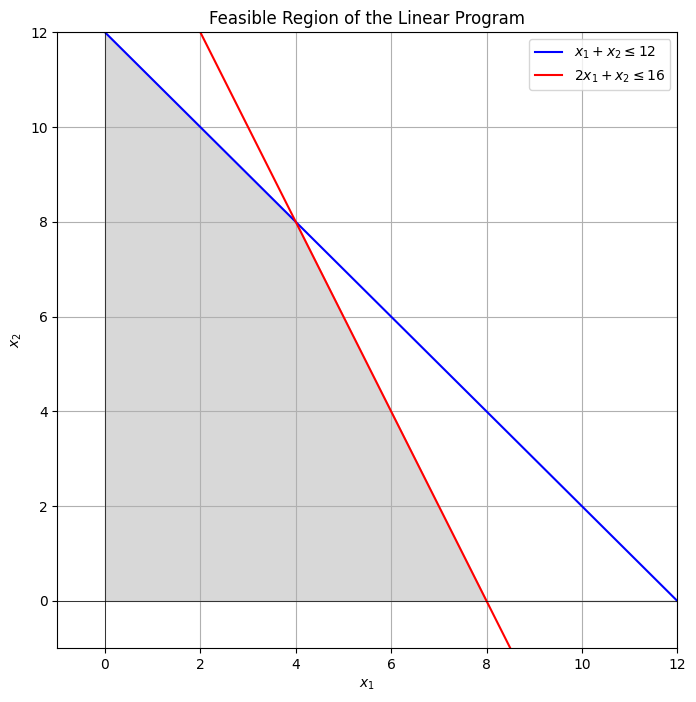

In [2]:
def constraint_1(x1):
    return 12 - x1
def constraint_2(x1):
    return 16 - 2*x1

# Define the feasible region
x1_vals = np.linspace(0, 12, 400) 

# Get the y values for each constraint
x2_vals_1 = constraint_1(x1_vals)
x2_vals_2 = constraint_2(x1_vals)

# Plot the constraints
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x1_vals, x2_vals_1, label=r'$x_1 + x_2 \leq 12$', color='b')
ax.plot(x1_vals, x2_vals_2, label=r'$2x_1 + x_2 \leq 16$', color='r')

# Fill the feasible region
ax.fill_between(x1_vals, np.maximum(0, np.minimum(x2_vals_1, x2_vals_2)), color='gray', alpha=0.3)

ax.set_xlim(-1, 12)
ax.set_ylim(-1, 12)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Feasible Region of the Linear Program')
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True)
ax.legend()

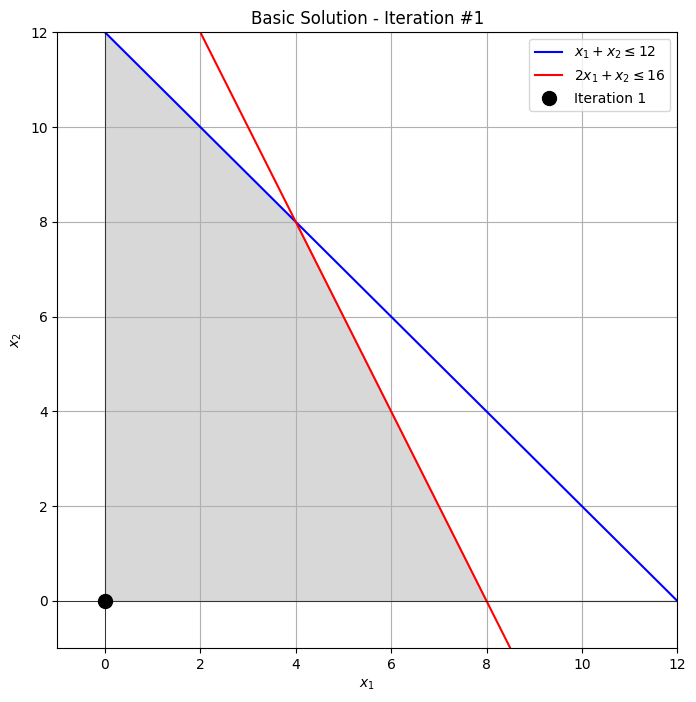

<Figure size 640x480 with 0 Axes>

In [3]:
#get basic solution of first iteration
example = SimplexMethod(c,A,b,verbose=False)
example.construct_tableau()
if example.tableau[-1, :-1][np.argmin(example.tableau[-1, :-1])] >= 0:
        print("Optimal solution found.")
num_decision_variables = len(example.c)
decision_values = np.zeros(num_decision_variables)
for i in range(len(example.c)):
    column = example.tableau[:, i]
    if np.count_nonzero(column[:-1]) == 1 and column[-1] == 0:
        row_index = np.argmax(column[:-1])
        decision_values[i] = example.tableau[row_index, -1]

#Add basic solution to plot
ax.plot(decision_values[0], decision_values[1], 'ko', markersize=10, label='Iteration 1')  # Add a green point at (4, 4)

# Update the title & legend
ax.set_title('Basic Solution - Iteration #1')
ax.legend()

plt.draw()

fig

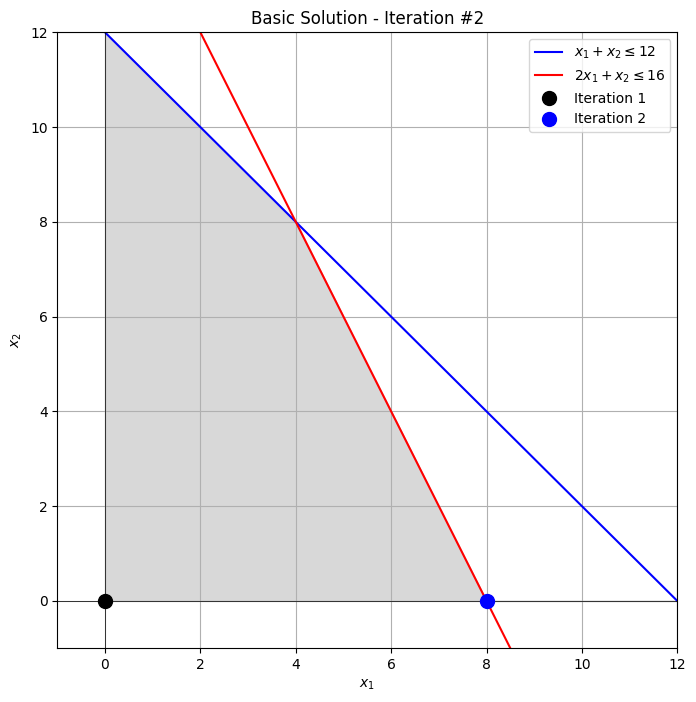

<Figure size 640x480 with 0 Axes>

In [4]:
#get basic solution of second iteration
example.pivot()
if example.tableau[-1, :-1][np.argmin(example.tableau[-1, :-1])] >= 0:
        print("Optimal solution found.")
decision_values = np.zeros(num_decision_variables)
for i in range(len(example.c)):
    column = example.tableau[:, i]
    if np.count_nonzero(column[:-1]) == 1 and column[-1] == 0:
        row_index = np.argmax(column[:-1])
        decision_values[i] = example.tableau[row_index, -1]

#Add basic solution to plot
ax.plot(decision_values[0], decision_values[1], 'bo', markersize=10, label='Iteration 2')  # Add a green point at (4, 4)

# Update the title & legend
ax.set_title('Basic Solution - Iteration #2')
ax.legend()

plt.draw()

fig

Optimal solution found.


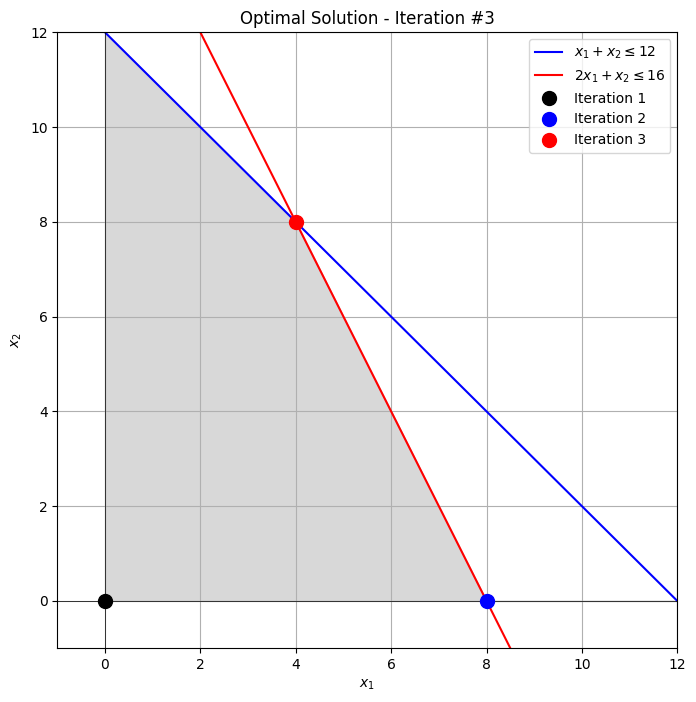

<Figure size 640x480 with 0 Axes>

In [5]:
#get basic solution of third iteration
example.pivot()
if example.tableau[-1, :-1][np.argmin(example.tableau[-1, :-1])] >= 0:
        print("Optimal solution found.")
decision_values = np.zeros(num_decision_variables)
for i in range(len(example.c)):
    column = example.tableau[:, i]
    if np.count_nonzero(column[:-1]) == 1 and column[-1] == 0:
        row_index = np.argmax(column[:-1])
        decision_values[i] = example.tableau[row_index, -1]

#Add basic solution to plot
ax.plot(decision_values[0], decision_values[1], 'ro', markersize=10, label='Iteration 3')  # Add a green point at (4, 4)

# Update the title & legend
ax.set_title('Optimal Solution - Iteration #3')
ax.legend()

plt.draw()

fig